In [1]:
import pandas as pd
df = pd.read_csv('review_data.csv')
df

,score,review,y
0,1,"예약할 때는 룸을 주기로 하고 홀을 주고, 덥고, 직원들이 정신이 없어 그 가격에 ...",0
1,5,점심식사 잘했던곳.후식커피한잔 하기도 좋고 주차가능합니다. 음식 맛있고 직원분 친절...,1
2,5,新鮮でおいしいです。,1
3,4,녹는다 녹아,1
4,4,NaN,1
...,...,...,...
75,2,이렇게 대기가 긴 맛집인줄 모르고 갔다가 엄청 기다림 예써라는 어플로 대기 하던데 ...,0
76,1,단짠의 정석. 진짜 정석으로 달고 짬. 질리는 맛. 사장님이랑 와이프로 추정되는 ...,0
77,4,만족스러움! 맛있어용,1
78,1,곱창은 없고 대창만 들어있어서 느끼한데 양념은 너무 매워서 위에 탈이나 고생했습니다ㅠㅠ,0


In [2]:
import re
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result
text_cleaning("abc가나다123 라마사아 123")

'가나다 라마사아 '

In [3]:
df['ko_text'] = df['review'].apply(lambda x : text_cleaning(str(x))) # null 값
df['ko_text']

0     예약할 때는 룸을 주기로 하고 홀을 주고 덥고 직원들이 정신이 없어 그 가격에 내가...
1     점심식사 잘했던곳후식커피한잔 하기도 좋고 주차가능합니다 음식 맛있고 직원분 친절하여...
2                                                      
3                                                녹는다 녹아
4                                                      
                            ...                        
75    이렇게 대기가 긴 맛집인줄 모르고 갔다가 엄청 기다림 예써라는 어플로 대기 하던데 ...
76    단짠의 정석 진짜 정석으로 달고 짬 질리는 맛  사장님이랑 와이프로 추정되는 서빙해...
77                                           만족스러움 맛있어용
78    곱창은 없고 대창만 들어있어서 느끼한데 양념은 너무 매워서 위에 탈이나 고생했습니다ㅠㅠ 
79    대창덮밥도 맛있고 곱도리탕도 맛나요 완전 소주각입니다  자리가 쫍아서 테이블마다 가...
Name: ko_text, Length: 80, dtype: object

In [4]:
df['review'].head()

0    예약할 때는 룸을 주기로 하고 홀을 주고, 덥고, 직원들이 정신이 없어 그 가격에 ...
1    점심식사 잘했던곳.후식커피한잔 하기도 좋고 주차가능합니다. 음식 맛있고 직원분 친절...
2                                           新鮮でおいしいです。
3                                               녹는다 녹아
4                                                  NaN
Name: review, dtype: object

In [5]:
df1 = df.loc[df['ko_text'].apply(lambda x : len(x)) > 0]
df1.isnull().value_counts()

score  review  y      ko_text
False  False   False  False      65
dtype: int64

In [6]:
del df['review']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   score    80 non-null     int64 
 1   y        80 non-null     int64 
 2   ko_text  80 non-null     object
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


In [7]:
from konlpy.tag import Okt

In [8]:
# 텍스트 데이터 형태소 추출
def get_pos(x) :
    tagger = Okt()
    pos = tagger.pos(x)
    # word : konlpy 모듈 형태소 분석단어
    # tag : 형태소 분석된 품사
    pos = ['{0}/{1}'.format(word, tag) for word, tag in pos]
    return pos

result = get_pos(df['ko_text'].values[0])
print(result)

['예약/Noun', '할/Verb', '때/Noun', '는/Josa', '룸/Noun', '을/Josa', '주기/Noun', '로/Josa', '하고/Verb', '홀/Noun', '을/Josa', '주고/Verb', '덥고/Adjective', '직원/Noun', '들/Suffix', '이/Josa', '정신/Noun', '이/Josa', '없어/Adjective', '그/Noun', '가격/Noun', '에/Josa', '내/Noun', '가/Josa', '직접/Noun', '구워/Verb', '먹고/Verb', '갈비살/Noun', '등심/Noun', '은/Josa', '질/Noun', '기고/Noun', '냉면/Noun', '은/Josa', '맛/Noun', '이/Josa', '없고/Adjective', '장어/Noun', '양념/Noun', '들/Suffix', '도/Josa', '제/Noun', '때/Noun', '안/Noun', '가져다/Verb', '주고/Verb', '회식/Noun', '으로/Josa', '한/Determiner', '시간/Noun', '만에/Josa', '만원/Noun', '을/Josa', '썼는데/Verb', '이런/Adjective', '경험/Noun', '처음/Noun', '입니다/Adjective']


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
                     #글뭉치(corpus) 인덱스로 생성
index_vectorizer = CountVectorizer(tokenizer = lambda x : get_pos(x))
# 
 # 형태소분석하고 단어품사 분리
x = index_vectorizer.fit_transform(df['ko_text'].tolist())
x.shape

(80, 779)

In [48]:
for a in x[:10] :
    print(a)

  (0, 504)	1
  (0, 743)	1
  (0, 224)	2
  (0, 162)	1
  (0, 236)	1
  (0, 538)	3
  (0, 631)	1
  (0, 235)	1
  (0, 721)	1
  (0, 769)	1
  (0, 629)	2
  (0, 189)	1
  (0, 650)	1
  (0, 210)	2
  (0, 546)	3
  (0, 609)	1
  (0, 485)	1
  (0, 97)	1
  (0, 18)	1
  (0, 491)	1
  (0, 141)	1
  (0, 13)	1
  (0, 651)	1
  (0, 87)	1
  (0, 281)	1
  (0, 34)	1
  (0, 222)	1
  (0, 537)	2
  (0, 653)	1
  (0, 107)	1
  (0, 145)	1
  (0, 258)	1
  (0, 481)	1
  (0, 588)	1
  (0, 468)	1
  (0, 192)	1
  (0, 610)	1
  (0, 453)	1
  (0, 29)	1
  (0, 772)	1
  (0, 536)	1
  (0, 738)	1
  (0, 417)	1
  (0, 250)	1
  (0, 251)	1
  (0, 439)	1
  (0, 551)	1
  (0, 61)	1
  (0, 672)	1
  (0, 573)	1
  (0, 650)	1
  (0, 13)	1
  (0, 604)	1
  (0, 585)	1
  (0, 761)	1
  (0, 79)	1
  (0, 776)	1
  (0, 691)	1
  (0, 723)	1
  (0, 618)	1
  (0, 635)	1
  (0, 22)	1
  (0, 540)	1
  (0, 261)	1
  (0, 363)	1
  (0, 689)	1
  (0, 600)	1
  (0, 321)	1
  (0, 648)	1

  (0, 154)	1
  (0, 155)	1


  (0, 162)	1
  (0, 546)	1
  (0, 491)	1
  (0, 192)	1
  (0, 251)	1
  (0, 672)	1
  (0, 

In [98]:
print(str(index_vectorizer.vocabulary_)[:60]+"..")

{'예약/Noun': 504, '할/Verb': 743, '때/Noun': 224, '는/Josa': 162..


In [99]:
# TF-IDF 변환
# TF : 1개 텍스트에 맛집 3번 있으면 3
# IDF : INVERSE역산 DF
#       모든 데이터에서 맛집단어가 10번이 존재, 0.1값
# TF - IDF 전체문서에서 나타나지 않지만 현재문서에서 많이 나타나면
#             그 단어가 현재문서에서 중요한 단어로 판단

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
# 글뭉치, 형태소분석의 단어
tfidf_vectorizer =  TfidfTransformer()
x = tfidf_vectorizer.fit_transform(x)
print(x.shape)


(80, 779)


In [17]:
# 긍부정 리뷰분류
# 데이터셋 분리
from sklearn.model_selection import train_test_split
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [57]:
x_train.shape

NameError: name 'x_train' is not defined

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [19]:
x_train.shape

(56, 779)

In [21]:
len(lr.coef_[0])

779

<BarContainer object of 779 artists>

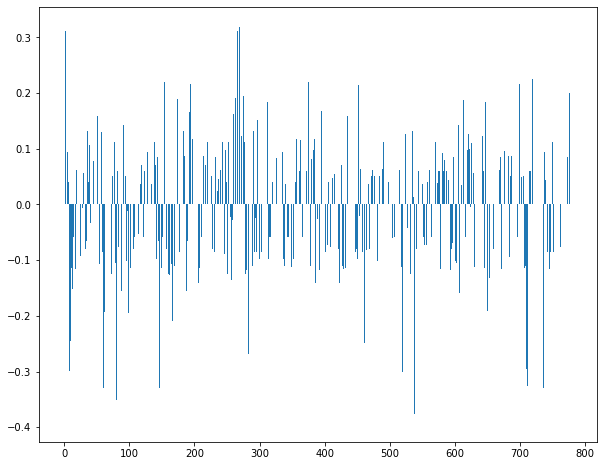

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [27]:
# lr.coef_[0] 내림차순
# 상위 양수 : 긍정적인 단어, 긍정가중치
sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5]

[(0.31921037916122147, 269),
 (0.31181674718077157, 266),
 (0.31181674718077157, 2),
 (0.22722099938708767, 778),
 (0.22499528665817484, 719)]

In [28]:
# 하위 음수 : 부정적인 단어, 부정 가중치값 5개
sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:]

[(-0.3303223649310512, 736),
 (-0.35074686047120107, 374),
 (-0.35074686047120107, 80),
 (-0.3756982096297823, 538),
 (-0.3907079128326151, 147)]

In [32]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)
invert_index_vectorizer = { v : k for k, v in index_vectorizer.vocabulary_.items()}
cnt = 0
for k, v in index_vectorizer.vocabulary_.items() :
    print(k, v)
    cnt += 1
    if cnt >= 10 :
        break
# index_vectorizer 글뭉치 데이터
# invert_index_vectorizer 피처 인덱스 : 단어 / 품사

예약/Noun 504
할/Verb 743
때/Noun 224
는/Josa 162
룸/Noun 236
을/Josa 538
주기/Noun 631
로/Josa 235
하고/Verb 721
홀/Noun 769


In [30]:
# 회귀모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력
for coef in coef_pos_index[:20] :
    print(invert_index_vectorizer[coef[1]], coef[0]) # 단어 품사
#      피처 인덱스값 가져와서, ceof 가중치 가져오기
# 진짜 신기하당. 원리는 강사님도 모른다

맛있어요/Adjective 0.31921037916122147
맛있댜/Noun 0.31181674718077157
ㅈㅁㅌㅌㄱㄹ/KoreanParticle 0.31181674718077157
흠/Noun 0.22722099938708767
하/Suffix 0.22499528665817484
비싸다으/Adjective 0.22048773641905486
맛잇으느/Noun 0.22048773641905486
녹아/Verb 0.22048773641905486
녹는다/Verb 0.22048773641905486
탕/Noun 0.2164660184839546
도리/Noun 0.2164660184839546
아이스크림/Noun 0.21489782468607826
후식/Noun 0.2005066237398065
매번/Noun 0.19501461266793108
맛있어용/Adjective 0.19425368225749348
만족스러/Adjective 0.19425368225749348
삼겹/Noun 0.19379228613545138
떡/Noun 0.19269205269234155
맛있네요/Adjective 0.19081949184719
닭갈비/Noun 0.1884669938903386


In [31]:
for coef in coef_pos_index[-20:] :
    print(invert_index_vectorizer[coef[1]], coef[0])

할말은/Verb -0.24837542600818435
않습니다/Verb -0.24837542600818435
많지만/Adjective -0.24837542600818435
그냥/Noun -0.2558545368223156
내/Noun -0.2666707017208134
먹기/Noun -0.2691943240304982
불친절해요/Adjective -0.282816560343047
해줌/Verb -0.2946023898159785
편하게/Adjective -0.2946023898159785
ㅜㅜ/KoreanParticle -0.29915590661697383
요/Josa -0.30167857441633256
평범함/Adjective -0.32572092898704597
무질/Noun -0.3292976179312531
너/Modifier -0.3292976179312531
겨/Noun -0.3292976179312531
하지/Verb -0.3303223649310512
비싸긴한데/Adjective -0.35074686047120107
괜찮아요/Adjective -0.35074686047120107
을/Josa -0.3756982096297823
너무/Adverb -0.3907079128326151


In [40]:
# 명사 기준으로 긍정 10개, 부정 10개
noun_list=[]
for coef in coef_pos_index :
    category = invert_index_vectorizer[coef[1]].split("/")[1] # 이름 가져오고 split
    if category == 'Noun' :
        noun_list.append((invert_index_vectorizer[coef[1]], coef[0]))
noun_list[:10]

[('맛있댜/Noun', 0.31181674718077157),
 ('흠/Noun', 0.22722099938708767),
 ('맛잇으느/Noun', 0.22048773641905486),
 ('탕/Noun', 0.2164660184839546),
 ('도리/Noun', 0.2164660184839546),
 ('아이스크림/Noun', 0.21489782468607826),
 ('후식/Noun', 0.2005066237398065),
 ('매번/Noun', 0.19501461266793108),
 ('삼겹/Noun', 0.19379228613545138),
 ('떡/Noun', 0.19269205269234155)]

In [42]:
# 형용사 기준으로 긍정 10개, 부정 10개
adjective_list=[]
for coef in coef_pos_index :
    category = invert_index_vectorizer[coef[1]].split("/")[1] # 이름 가져오고 split
    if category == 'Adjective' :
        adjective_list.append((invert_index_vectorizer[coef[1]], coef[0]))
adjective_list[:10]        

[('맛있어요/Adjective', 0.31921037916122147),
 ('비싸다으/Adjective', 0.22048773641905486),
 ('맛있어용/Adjective', 0.19425368225749348),
 ('만족스러/Adjective', 0.19425368225749348),
 ('맛있네요/Adjective', 0.19081949184719),
 ('맛있고/Adjective', 0.16450683695840304),
 ('맛있게/Adjective', 0.16330050009866345),
 ('좋음/Adjective', 0.1431229621617376),
 ('정갈하게/Adjective', 0.1431229621617376),
 ('비싸지만/Adjective', 0.1431229621617376)]

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy :%.2f" %accuracy_score(y_test, y_pred)) # (TP+TN) / TP+TN+FP+FN
print("precision_score :%.2f" %precision_score(y_test, y_pred))
print("recall_score :%.2f" %recall_score(y_test, y_pred))
print("f1_score :%.2f" %f1_score(y_test, y_pred))

NameError: name 'y_test' is not defined

In [ ]:
# (TP+TN) / TP+TN+FP+FN
# print("accuracy :%.2f" %accuracy_score(y_test, y_pred)) 
=> 그냥 다 TRUE로 하면 90%인데?

# TP / TP+FP
# print("precision_score :%.2f" %precision_score(y_test, y_pred))
=> 얼마나 적절하게 맞췄는가?, TRUE 예측 중에  실제 TRUE

# (TP+TN) / TP+FN
# print("recall_score :%.2f" %recall_score(y_test, y_pred))

# print("f1_score :%.2f" %f1_score(y_test, y_pred))

In [104]:
from sklearn.metrics import confusion_metrix
confmat = contusion_matrix(y_test, y_pred)
print(confmat)
# [[]
# []]

ImportError: cannot import name 'confusion_metrix' from 'sklearn.metrics' (C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
실0[][]
실1[][]
  예0예1
TP : 실제 T, 예측 P // 진짜 posi 54
TN : 실제 F, 예측 N // 진짜 nega8
FP : 실제 F, 예측 P 가짜 posi 31
FN : 실제 T, 예측 n 가짜 false 1
F[TN][FP]
T[FN][TP]
  N P
정확도 62(54+8) / 94(54+8+31+1)  = 0.659
정밀도 54 / 85(54+31) = 0.635
재현율 54 / 55(54 + 1) = 0.9818
F1score 2*( 0.635* 0.9818) / ( 0.635+ 0.9818)
    
# 특이도 specificity 모델이 false로 예측한 정답중 실제 false
tn / tn+fp


In [ ]:
roc
roc
y : tpr true positive rate 진짜 양성비율
x : Fpr false positive rate 가짜 양성비율 1-특이율
auc (Area under the curve) : 곡선 아래 면적

In [105]:
# roc
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# y_pred 예측값
# y_pred_probability 예측값의 확률값
y_pred_probability = lr.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = \
            roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC : %.3f' % roc_auc)

NameError: name 'x_test' is not defined

In [106]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, \
         label='ROC  Curve(area = %0.3f)' % roc_auc, 
         color = 'red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc='lower right')

NameError: name 'false_positive_rate' is not defined